# Inteligentná analýza údajov

## Prvá fáza semestrálneho projektu: Prieskumná analýza

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

# Príprava dataframe-ov

In [26]:
#načítanie datasetov
filename1 = "Dataset/other_train.csv"
filename2 = "Dataset/personal_train.csv"
df_raw = pd.read_csv(filename1)
df = pd.read_csv(filename1)
df_pt = pd.read_csv(filename2)

In [27]:
# data v medical_info sú nepoužitelné v danej forme
# preto sme museli tento stĺpec rozdeliť do viacerých tak aby sme s dátami mohli pracovať

nazvy = ['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen',
         'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']

#vytvorenie stĺpcov
for nazov in nazvy:
    df[nazov] = pd.Series('', index=df.index)

#funkcia pre naformatovanie dat v medical_info a priradenie dát do novovytvorených stĺpcov
def medinfofun(text):
    if "{" in str(text):
        text = text.translate({ord(i): None for i in "{}'"})
        text = text.split(',')
        new = []
        names = [['mean_glucose'], ['std_glucose'], ['kurtosis_glucose'], ['skewness_glucose'], ['mean_oxygen'],
                 ['std_oxygen'], ['kurtosis_oxygen'], ['skewness_oxygen']]
        for x in text:
            new.append(x.split(':'))
        for a in range(len(new)):
            names[a].append(new[a][1])

        return pd.Series([names[0][1], names[1][1], names[2][1], names[3][1], names[4][1],
                          names[5][1], names[6][1], names[7][1]])
    return pd.Series('0')


df[['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen',
    'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']] = df.medical_info.apply(medinfofun).astype(float)

df = df.drop('medical_info', 1)

In [28]:
# upravený dataframe z csv other_train
df.head()

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,0,Charles Foster,"475 Chris Cliff\r\nNew Aaron, MN 28762",Black,Married-civ-spouse,?,f,1.0,Husband,0.0,...,0.0,?,115.171875,55.607878,0.094166,-0.431833,3.504181,23.103283,7.103304,52.416358
1,1,Kelly Presha,"868 Victoria Pine\r\nSarahmouth, HI 89920",White,Married-civ-spouse,Craft-repair,f,9.0,Husband,0.0,...,0.0,Private,8.750000,30.958389,6.279269,40.917837,98.510870,55.032454,0.971090,0.311752
2,2,Fred Morris,"986 Jessica Lodge\r\nLake Maryland, GA 86175",White,Divorced,Adm-clerical,NaN,9.0,Not-in-family,0.0,...,0.0,Private,103.734375,45.952163,0.452158,0.370659,2.257525,13.824893,9.493860,123.173836
3,3,Lance Black,"5504 Cook Pass Suite 642\r\nJosephside, AL 44758",White,Married-civ-spouse,Farming-fishing,f,4.0,Husband,0.0,...,0.0,Self-emp-not-inc,111.156250,45.561160,0.169528,0.354618,5.755017,31.511521,5.785992,33.377684
4,4,Joseph Nance,"2440 Haynes Ferry\r\nSamuelstad, RI 51752",White,Married-civ-spouse,Tech-support,F,9.0,Wife,0.0,...,1887.0,State-gov,99.429688,43.658777,0.349696,0.636882,0.387124,8.683190,25.389201,685.063422


In [29]:
# dataframe z csv personel_train
df_pt.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",NaN,Male,1976-11-28
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",66,Female,1953/05/02
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",48,Female,1971-06-15
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",62,Female,1957-02-05
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",30,Male,1989-10-13


In [30]:
# vykonáme merge nad našimi dvomi datasetmi na základe mena a adresy
df_both = pd.merge(df_pt, df, on=['address', 'name'])
df_both.pop('Unnamed: 0_x')
df_both.pop('Unnamed: 0_y')
df_both

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",NaN,Male,1976-11-28,Black,Never-married,Prof-specialty,f,13.0,...,0.0,Local-gov,143.140625,-5000.667680,-0.192430,-0.289805,3.612040,23.332947,7.362556,57.539899
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",66,Female,1953/05/02,White,Never-married,Tech-support,f,13.0,...,0.0,Private,69.695312,43.543182,1.649895,3.485576,141.780936,86.945840,-0.788772,-1.042767
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",48,Female,1971-06-15,White,Never-married,Adm-clerical,f,10.0,...,0.0,Private,64.203125,48.011125,2.348346,5.995983,101.029264,70.706575,0.348988,-0.711533
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",62,Female,1957-02-05,White,Never-married,Handlers-cleaners,f,9.0,...,0.0,Private,105.179688,48.403485,0.558845,0.354786,2.431438,16.347179,9.591592,110.197989
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",30,Male,1989-10-13,White,Never-married,Sales,f,10.0,...,0.0,Private,NaN,50.626282,0.408694,-0.135012,2.307692,15.866257,9.088810,100.233890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",51,Male,1968-10-22,White,Never-married,Adm-clerical,f,10.0,...,0.0,Private,100.218750,4651.829907,0.282240,0.452805,1.572742,13.949283,12.051809,173.668604
3979,William Pope,68430 Erik Terrace Suite 279\r\nPort Adamborou...,24,Male,1994-11-26,White,Married-civ-spouse,Transport-moving,f,12.0,...,0.0,Self-emp-not-inc,117.179688,52.605465,0.149329,-0.234643,54.162207,81.106780,1.028059,-0.623457
3980,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,53,Female,1966-01-16,White,Married-civ-spouse,Prof-specialty,f,14.0,...,0.0,Self-emp-inc,128.382812,51.129297,-0.095540,-0.192756,22.011706,59.724688,2.550923,4.987447
3981,Frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",56,Male,1963-03-22,White,Never-married,Other-service,f,10.0,...,0.0,Private,125.843750,47.623595,0.234284,-0.225826,2.294314,16.766705,9.262974,97.828706


# Základný opis dát spolu s ich charakteristikami

In [31]:
# tieto počty nám naznačujú že v other_train sú nejaké osoby viackrát 
# alebo je tam o 50 osôb viac ako v personel_train datasete

pocet_riadkov, pocet_stlpcov = df.shape
print("Počet záznamov v other_train:",pocet_riadkov)
print("Počet atribútov v other_train:",pocet_stlpcov)

pocet_riadkov, pocet_stlpcov = df_pt.shape
print("\nPočet záznamov v personel_train:",pocet_riadkov)
print("Počet atribútov v personel_train:",pocet_stlpcov)

Počet záznamov v other_train: 3983
Počet atribútov v other_train: 26

Počet záznamov v personel_train: 3933
Počet atribútov v personel_train: 6


In [32]:
# informácie ohladom dataframe-u
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3983 non-null   int64  
 1   name              3983 non-null   object 
 2   address           3983 non-null   object 
 3   race              3962 non-null   object 
 4   marital-status    3966 non-null   object 
 5   occupation        3959 non-null   object 
 6   pregnant          3967 non-null   object 
 7   education-num     3976 non-null   float64
 8   relationship      3972 non-null   object 
 9   capital-gain      3965 non-null   float64
 10  education         3962 non-null   object 
 11  fnlwgt            3964 non-null   float64
 12  class             3963 non-null   float64
 13  income            3963 non-null   object 
 14  native-country    3966 non-null   object 
 15  hours-per-week    3968 non-null   float64
 16  capital-loss      3959 non-null   float64


In [379]:
# informácie ohladom dataframe-u
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3670 non-null   object
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(1), object(5)
memory usage: 107.6+ KB


In [262]:
#štatistické hodnoty čiselných atribútov (other_train)

include =['float'] 
desc = df.describe(include = include)
desc

,education-num,capital-gain,fnlwgt,class,hours-per-week,capital-loss,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
count,3976.000000,3965.000000,3.964000e+03,3963.000000,3968.000000,3959.000000,3587.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000
mean,10.068913,1165.191173,1.910926e+05,0.255362,40.384325,88.021723,100.900239,72.643784,0.948002,4.201711,18.519389,31.187359,7.407227,91.138720
std,2.660549,7991.492407,1.075397e+05,0.436120,12.498116,411.623025,34.080150,1454.257388,1.607876,9.652821,34.864148,22.318089,4.808268,108.297251
min,1.000000,0.000000,1.989900e+04,0.000000,1.000000,0.000000,0.000000,-7110.621457,-1.641515,-1.755332,0.213211,7.370432,-2.597872,-1.976976
25%,9.000000,0.000000,1.189220e+05,0.000000,40.000000,0.000000,87.402344,39.434675,0.072237,-0.119656,2.065635,15.049218,3.637833,12.867870
50%,10.000000,0.000000,1.793445e+05,0.000000,40.000000,0.000000,110.664062,45.936325,0.310784,0.372981,3.237458,20.594663,7.780317,68.338302
75%,13.000000,0.000000,2.351010e+05,1.000000,45.000000,0.000000,124.089844,51.021751,0.773769,2.080120,12.639632,43.237478,10.259026,126.895481
max,16.000000,99999.000000,1.484705e+06,1.000000,99.000000,4356.000000,189.734375,7678.445784,8.069522,68.101622,217.371238,110.642211,34.539844,1191.000837


In [33]:
#štatistické hodnoty atribútov typu object (other_train)
#tu si môžeme všimnúť, že stĺpec address uchováva viacero údajov ktoré by sme mali do ďaľšej fázy rozdeliť
include =['object'] 
desc = df.describe(include = include)
desc

,name,address,race,marital-status,occupation,pregnant,relationship,education,income,native-country,workclass
count,3983,3983,3962,3966,3959,3967,3972,3962,3963,3966,3968
unique,3933,3933,5,7,14,6,6,16,2,39,9
top,Shaun Juckett,"578 Edward Roads\r\nHornland, MI 25975",White,Married-civ-spouse,Prof-specialty,f,Husband,HS-grad,<=50K,United-States,Private
freq,3,3,3366,1852,524,3492,1636,1228,2964,3560,2767


In [389]:
#štatistické hodnoty čiselných atribútov v personel_train nemáme žiadne keďže age nemá typ float64 ale object

In [34]:
#štatistické hodnoty atribútov typu object (personel_train)
include =['object'] 
desc = df_pt.describe(include = include)
desc

,name,address,age,sex,date_of_birth
count,3933,3933,3670,3933,3933
unique,3933,3933,84,2,3705
top,Edward Anderson,"4712 Aaron Plaza\r\nNorth Tinamouth, IL 24291",53,Male,1973-01-29
freq,1,1,136,2614,4


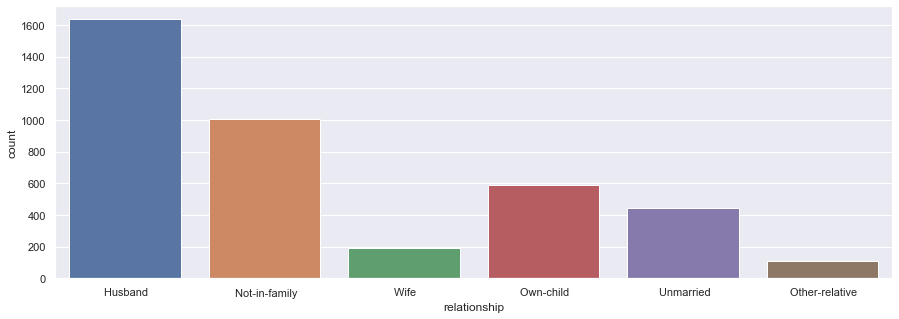

In [35]:
# v datasete sa vyskytuje z pomedzi osôb najviac manželov
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(x='relationship', data=df)

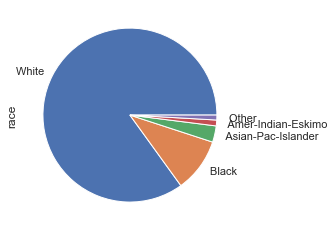

In [36]:
#rôznorodosť rás v datasete - prevažná väčšina je miela rasa
df["race"].value_counts().plot(kind='pie')

# Párová analýza dát

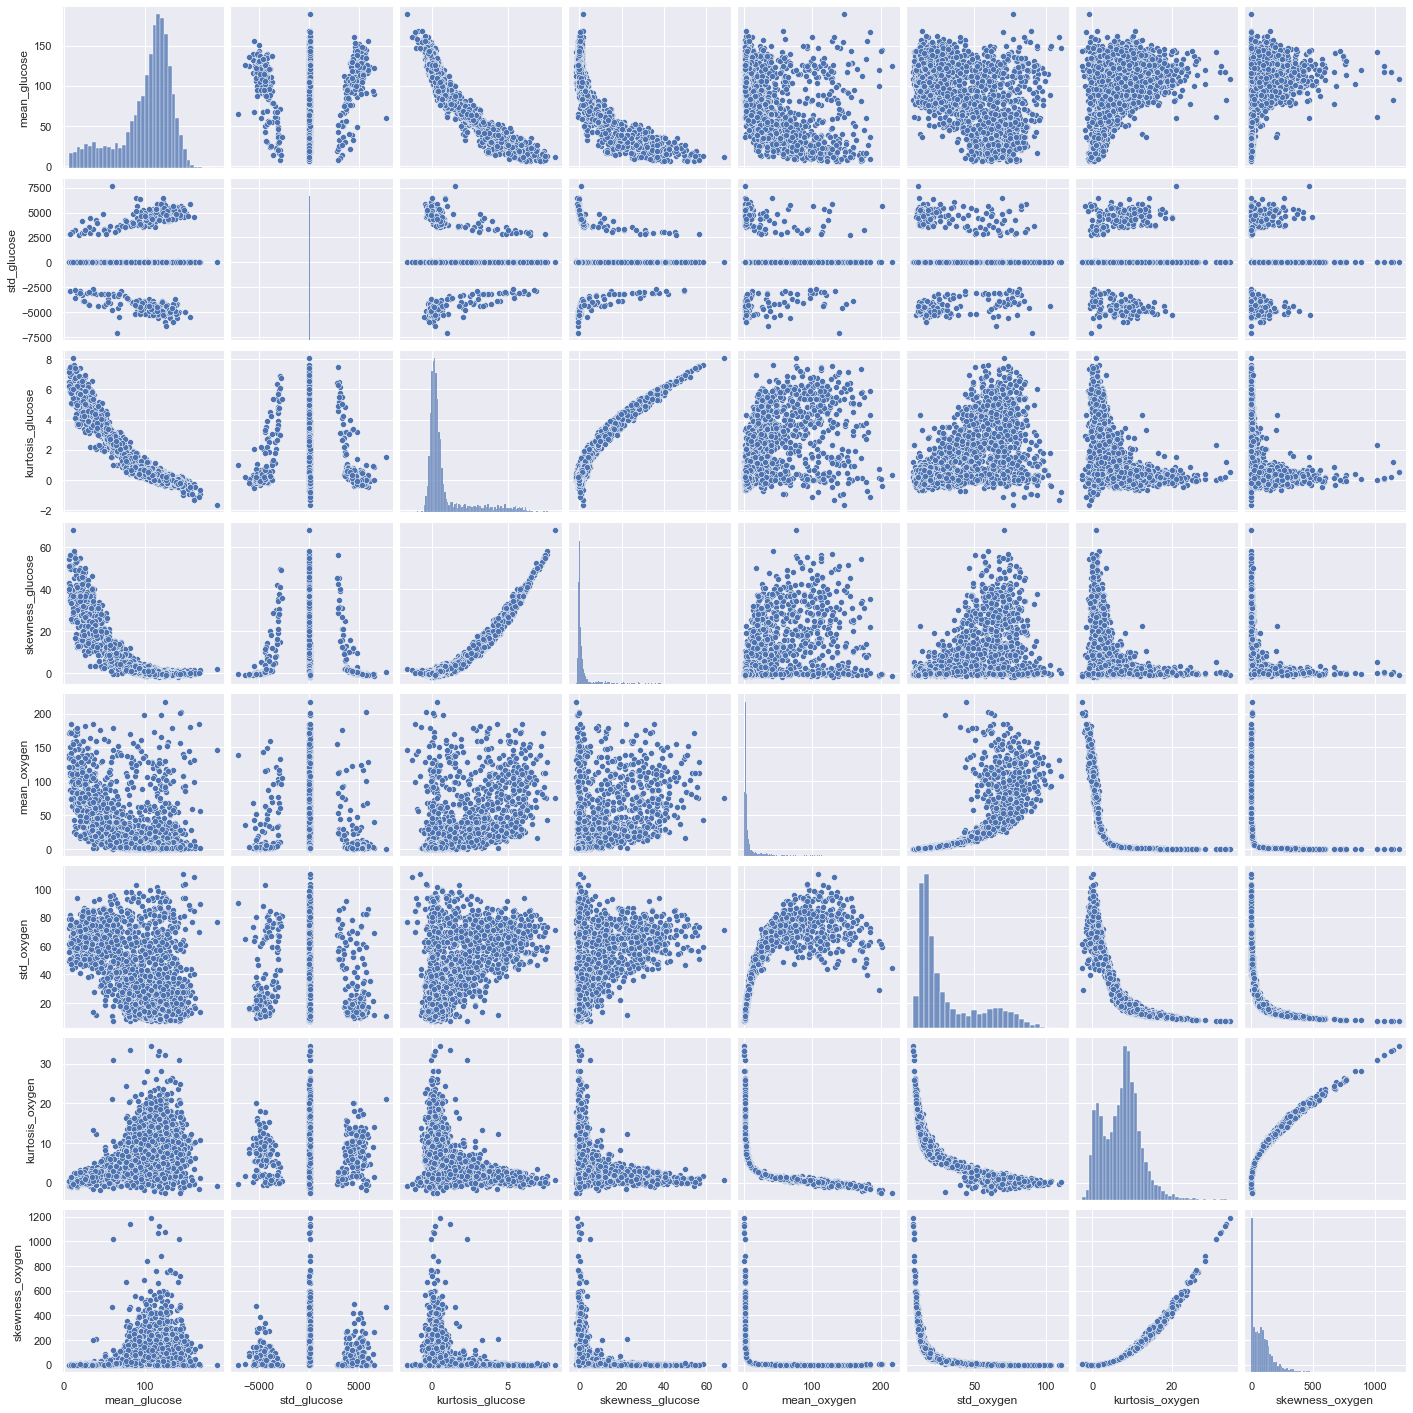

In [57]:
# možné vzťahy medzi hlavnými atribútmi
sns.pairplot(df.dropna()[['mean_glucose', 
                          'std_glucose', 
                          'kurtosis_glucose', 
                          'skewness_glucose',
                         'mean_oxygen',
                         'std_oxygen',
                         'kurtosis_oxygen',
                         'skewness_oxygen']])

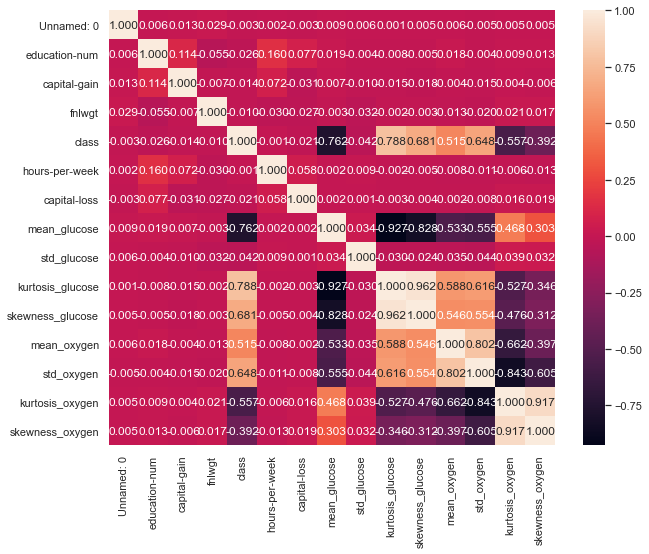

In [58]:
# heatmap graf nám pomôže prísť na to kroré atribúty medzi sebou majú akú koreláciu
# na základe tohto grafu si vieme vybrať tie zaujímavé kombinácie atribútov s negatívnou alebo pozitívnou koreláciou
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

Pearson correlation: -0.927


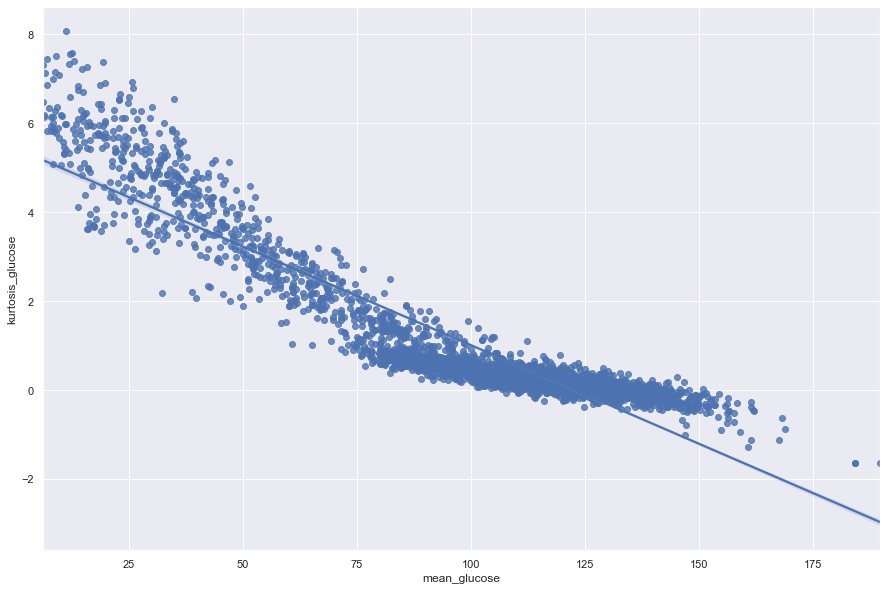

In [213]:
# môžeme vidieť že medzi mean_glucose a kurtosis_glucose ide o silne negatívnu koreláciu
sns.regplot(x="mean_glucose", y="kurtosis_glucose", data=df)
print("Pearson correlation: %.3f" % df['mean_glucose'].corr(df['kurtosis_glucose']))

Pearson correlation: 0.962


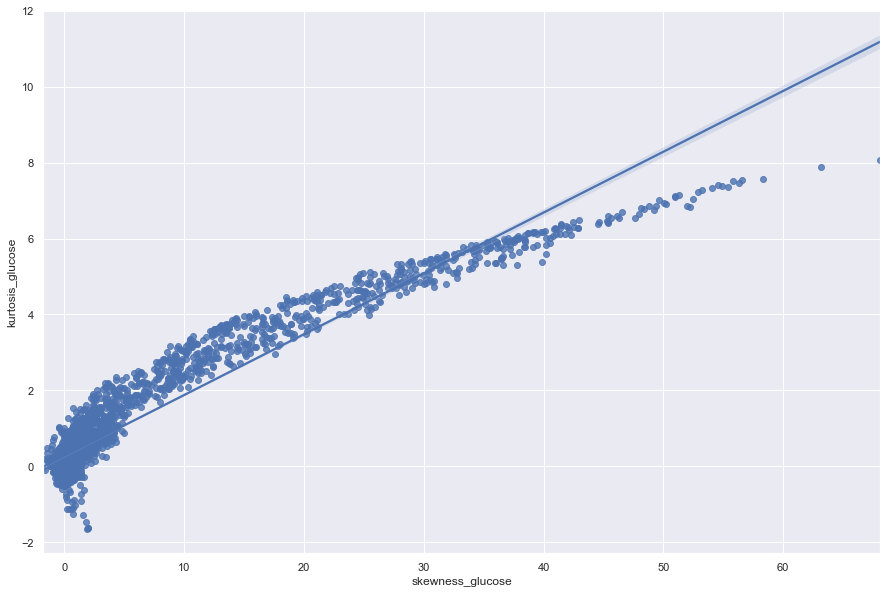

In [214]:
# môžeme vidieť že medzi skewness_glucose a kurtosis_glucose ide o silne pozitívnu koreláciu
sns.regplot(x="skewness_glucose", y="kurtosis_glucose", data=df)
print("Pearson correlation: %.3f" % df['skewness_glucose'].corr(df['kurtosis_glucose']))

Pearson correlation: 0.788


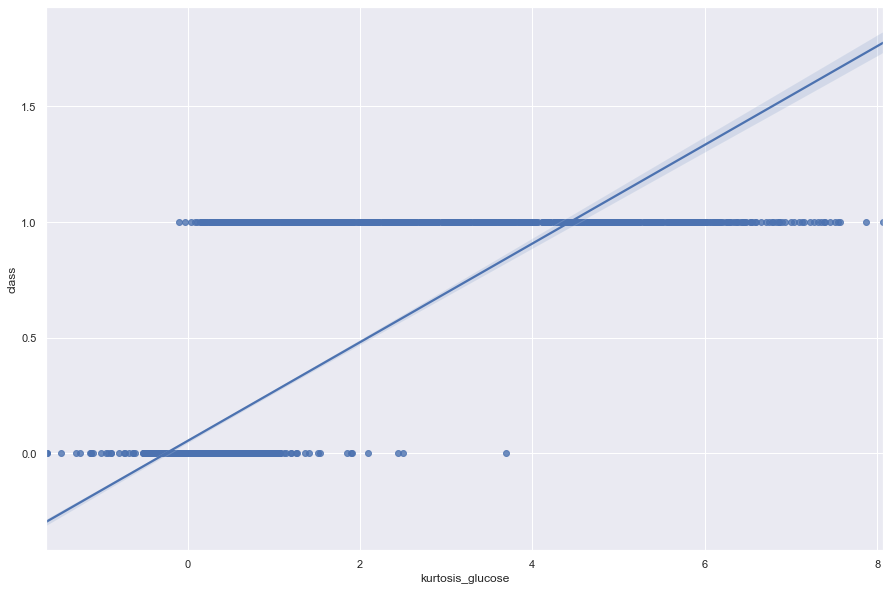

In [216]:
# medzi kurtosis_glucose a class - silná korelácia
sns.regplot(x="kurtosis_glucose", y="class", data=df)
print("Pearson correlation: %.3f" % df['kurtosis_glucose'].corr(df['class']))

c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

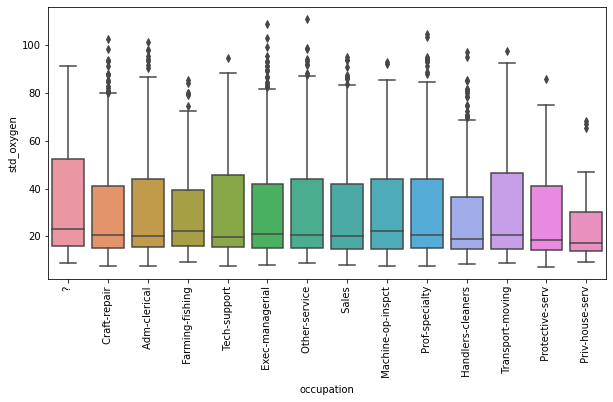

In [19]:
# ako sa líšia std_oxygen hodnoty pri jednotlivých pracovných miest
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot('occupation', 
            'std_oxygen', 
            data=df)
pylab.xticks(rotation=90)

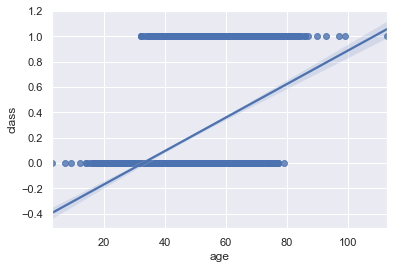

In [59]:
# môžeme vidieť že s pribúdajúcim vekom rastie aj výskyt cukrovky
df_both['age'] = df_both['age'].replace('??', np.NaN)
df_both['age'] = df_both['age'].astype(float)
sns.regplot(x="age", y="class", data=df_both)

Všetci muži: 2649 , počet mužov s cukrovkou: 649 , percentuálne vyjadrenie  24.499811249528126 %
Všetky ženy: 1334 , počet žien s cukrovkou: 363 , percentuálne vyjadrenie  27.211394302848575 %


c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


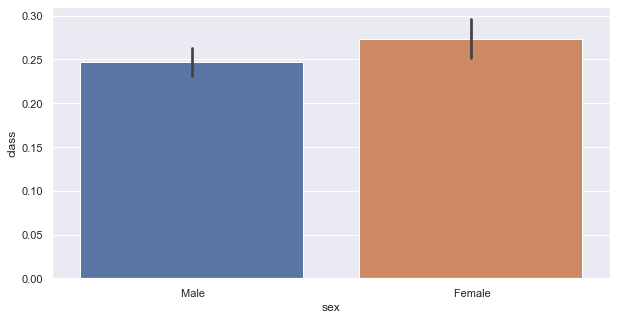

In [185]:
# 25% zo všetkych mužov z nášho datasetu a 27.2% zo všetkých žien má cukrovku

muzi,zeny = df_both.sex.value_counts()
muzi_c,zeny_c = df_both[df_both['class'] == 1.00].sex.value_counts()

print("Všetci muži:",muzi,", počet mužov s cukrovkou:",muzi_c, ", percentuálne vyjadrenie ",muzi_c/muzi*100,"%")
print("Všetky ženy:",zeny,", počet žien s cukrovkou:",zeny_c, ", percentuálne vyjadrenie ",zeny_c/zeny*100,"%")

sns.barplot(df_both['sex'], df_both['class'], data=df_both)

# Hypotézy

## 1. hypotéza

In [ ]:
# 1. H0 : Ľudia s cukrovkou nemajú v priemere vyžšie hodnoty skewness_glucose ako zdravý ludia
#    H1 : Ľudia s cukrovkou majú v priemere vyžšie hodnoty skewness_glucose ako zdravý ludia

In [96]:
# vytvoríme si naša vzorky
sample_size = 100

chori_ludia = df[df['class']==1.00].skewness_glucose
zdravi_ludia = df[df['class']==0.00].skewness_glucose
chori_ludia = chori_ludia.dropna()
zdravi_ludia = zdravi_ludia.dropna()

# test môžeme vykonať so všetkými údajmi alebo si môžeme spraviť menšie vzorky a testy opakovať s rôznou velkosťou
#chori_ludia = chori_ludia.sample(n=sample_size, replace=False)
#zdravi_ludia = zdravi_ludia.sample(n=sample_size, replace=False)

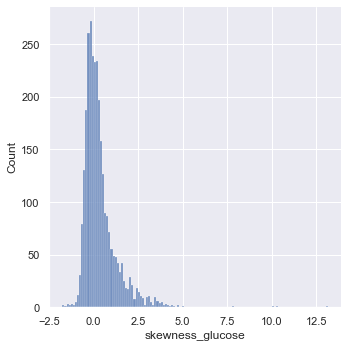

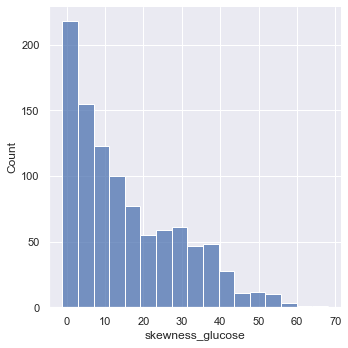

In [151]:
sns.displot(zdravi_ludia)
sns.displot(chori_ludia)

In [152]:
zdravi_ludia.mean()

0.3570110759595376

In [153]:
chori_ludia.mean()

15.46131114433697

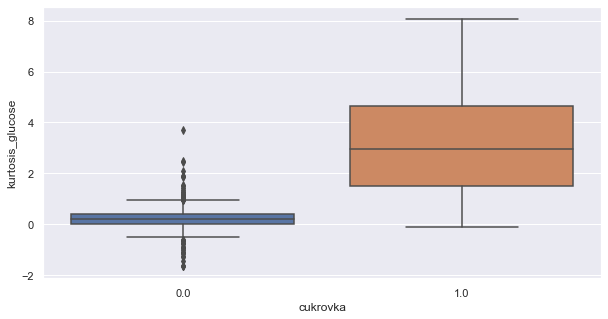

In [100]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x='class', y='kurtosis_glucose', data=df).set(xlabel='cukrovka', ylabel='kurtosis_glucose')
plt.show()

In [ ]:
# teraz zistíme či ide o normálové distribúcie alebo iné distribúcie pomocou Shapiro-Wilk testu

c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.7885728478431702, pvalue=0.0)
Another distributions (reject H0)


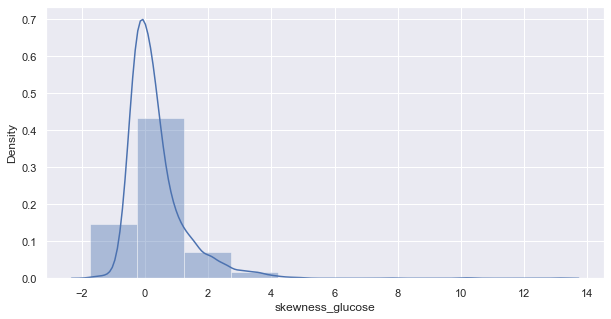

In [101]:
# test pre vzorku zdravých ľudí

sns.distplot(zdravi_ludia, bins=10)

shapiro_test = shapiro(zdravi_ludia)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9006683826446533, pvalue=4.80037884564123e-25)
Another distributions (reject H0)


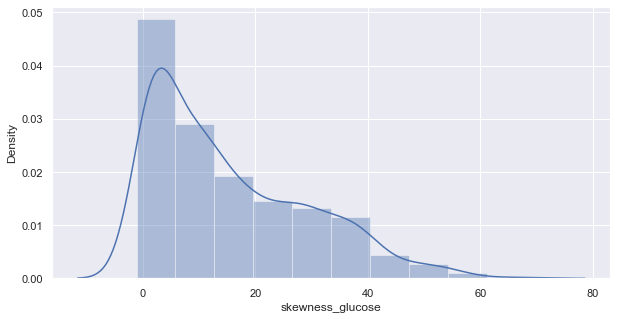

In [102]:
# test pre vzorku ľudí s cukrovkou

sns.distplot(chori_ludia, bins=10)

shapiro_test = shapiro(chori_ludia)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

In [251]:
# zistili sme že abe rozdelenia niesú normálne takže môžme spraviť Mann-Whitneyho test

In [154]:
# porovnanie vzoriek
stats.mannwhitneyu(chori_ludia, zdravi_ludia) 

MannwhitneyuResult(statistic=163358.0, pvalue=0.0)

In [ ]:
# z Mann-Whitney testu sme zistili že H0 zamietame pretože hodnota p je strašne malá (p < 0,005)
# platí H1

## 2. hypotéza

In [505]:
# 1. H0 : Starší (>=65) ľudia majú vyžšie priemerné hodnoty cukru v krvi ako (<65) mladši.
#    H1 : Starší (>=65) ľudia nemajú vyžšie priemerné hodnoty cukru v krvi ako (<65) mladši.

In [105]:
# pre túto hypotézu si musíme transromovať dáta age do typu int

df_both['age'] = df_both['age'].replace('??', np.NaN)
df_both['age'] = df_both['age'].astype(float)

In [186]:
# teraz si môžeme vytvoriť vzorky
sample_size = 500

mladsi_ludia = df_both[df_both['age']<65].mean_glucose
starsi_ludia = df_both[df_both['age']>=65].mean_glucose

mladsi_ludia = mladsi_ludia.dropna()
starsi_ludia = starsi_ludia.dropna()

# pre prípadné vzorkovanie populácie
#mladsi_ludia = mladsi_ludia.sample(n=sample_size, replace=False)
#starsi_ludia = starsi_ludia.sample(n=sample_size, replace=False)

In [187]:
print("Priemerná glukóza u starších ľudí:",starsi_ludia.mean())
print("Priemerná glukóza u mladších ľudí:",mladsi_ludia.mean())

Priemerná glukóza u starších ľudí: 83.32684125586854
Priemerná glukóza u mladších ľudí: 103.55772025939177


c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


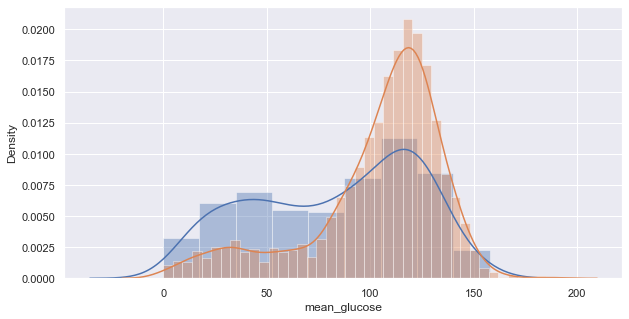

In [137]:
sns.distplot(starsi_ludia)
sns.distplot(mladsi_ludia)

In [ ]:
# teraz zistíme či ide o normálové distribúcie alebo iné distribúcie pomocou Shapiro-Wilk testu

ShapiroResult(statistic=0.9484632611274719, pvalue=5.088167040478986e-11)
Another distributions (reject H0)


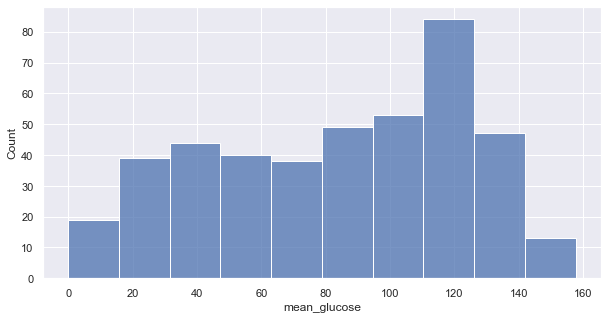

In [138]:
# test pre vzorku starších ľudí

sns.histplot(starsi_ludia, bins=10)

shapiro_test = shapiro(starsi_ludia)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.8906108736991882, pvalue=1.0566771329934148e-40)
Another distributions (reject H0)


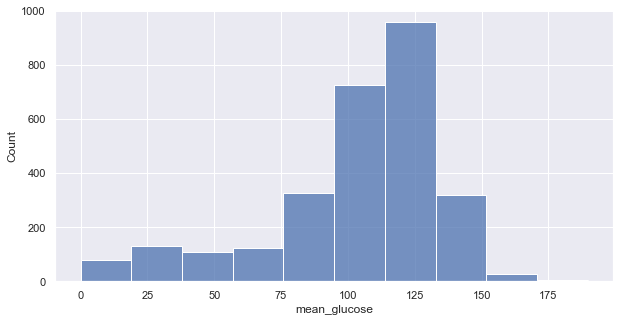

In [139]:
# test pre vzorku mladších ľudí

sns.histplot(mladsi_ludia, bins=10)

shapiro_test = shapiro(mladsi_ludia)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

In [ ]:
# zistili sme zo shapirovho testu že obe hodnoty niesú normálneho rozdelenia takže môžeme vykonať Mann-Whitneyon test
# (ak by sa ukázali naše vzorky že sú z normálnej distribúcie tak by sme vykonali Študentov T-test)

In [141]:
mannwhitneyu(mladsi_ludia, starsi_ludia)

MannwhitneyuResult(statistic=419819.0, pvalue=4.789924547338472e-23)

In [ ]:
# test ukázal že hodnota pvalue je nízka, čo znamená že H0 opäť nepotvrdzujeme

# Identifikácia problémov v dátach

In [124]:
# v pôvodnom dataframe z other_train.csv boli dáta o cukrovke schované v medical_info
df_raw.medical_info
# pre umožnenie práce s nimi sme museli tento column rozdeliť do podoby s ktorou teraz pracujeme

0       {'mean_glucose':'115.171875','std_glucose':'55...
1       {'mean_glucose':'8.75','std_glucose':'30.95838...
2       {'mean_glucose':'103.734375','std_glucose':'45...
3       {'mean_glucose':'111.15625','std_glucose':'45....
4       {'mean_glucose':'99.4296875','std_glucose':'43...
                              ...                        
3978    {'mean_glucose':'104.5859375','std_glucose':'3...
3979    {'mean_glucose':'96.3125','std_glucose':'39.61...
3980    {'mean_glucose':'126.5859375','std_glucose':'4...
3981    {'mean_glucose':'121.5234375','std_glucose':'4...
3982    {'mean_glucose':'125.8046875','std_glucose':'5...
Name: medical_info, Length: 3983, dtype: object

In [125]:
# 1. problém je v tom, že niektoré osoby sa v datasete vyskytujú viackrát (2-3 Fred Morris, 9-10 Maurice Riley)
#     čo následne skresluje výsledky našeho snaženia ... tieto výskyty jednej osoby by sme mali spojiť do jedného úplného údaju
# 2. problém je v tom, že dátum narodenia je vo veľa formátoch ktoré by sme mali ujednotiť aby sa s tým dalo pracovať
# 3. adresu osôb treba rozdeliť do viacero stĺpcov aby sme s nou neskôr mohli jednoducho pracovať a pristupovať
#     priamo k mestám alebo uliciam atd.

df_both.head(15)

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",NaN,Male,1976-11-28,Black,Never-married,Prof-specialty,f,13.0,...,0.0,Local-gov,143.140625,-5000.667680,-0.192430,-0.289805,3.612040,23.332947,7.362556,57.539899
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",66.0,Female,1953/05/02,White,Never-married,Tech-support,f,13.0,...,0.0,Private,69.695312,43.543182,1.649895,3.485576,141.780936,86.945840,-0.788772,-1.042767
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",48.0,Female,1971-06-15,White,Never-married,Adm-clerical,f,10.0,...,0.0,Private,64.203125,48.011125,2.348346,5.995983,101.029264,70.706575,0.348988,-0.711533
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",62.0,Female,1957-02-05,White,Never-married,Handlers-cleaners,f,9.0,...,0.0,Private,105.179688,48.403485,0.558845,0.354786,2.431438,16.347179,9.591592,110.197989
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",30.0,Male,1989-10-13,White,Never-married,Sales,f,10.0,...,0.0,Private,NaN,50.626282,0.408694,-0.135012,2.307692,15.866257,9.088810,100.233890
5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",42.0,Male,1976-12-10,White,Married-civ-spouse,Sales,f,9.0,...,0.0,Private,97.914062,42.030872,0.370334,0.594105,1.530100,16.101629,11.756891,146.982252
6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,43.0,Female,1976-02-28,White,Separated,Other-service,f,9.0,...,0.0,State-gov,130.250000,5492.822021,0.049617,-0.644386,10.275920,47.377628,4.417689,17.628616
7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,70.0,Male,01/05/1949,White,Married-civ-spouse,Adm-clerical,F,9.0,...,0.0,Private,19.414062,46.191099,3.705014,13.046057,96.028428,61.410014,0.610825,-0.194555
8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",42.0,Female,1977-06-04,White,Never-married,?,f,9.0,...,0.0,?,102.234375,44.507809,0.543619,0.455562,4.750836,28.102264,6.250715,39.413597
9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",NaN,Male,1956-02-05,White,Divorced,Craft-repair,f,9.0,...,0.0,Private,97.523438,5295.368921,0.621356,0.342541,1.295151,12.626643,13.227261,205.582725


In [390]:
# tu si môžeme všimnúť že age je typu object čo je chyba a pre prácu s age budeme potrebovať
# tieto hodnoty v type int64 (je typu object lebo obsahuje hodnoty ako napr. ??, a to jednoducho na int nevieme pretypovať)
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3670 non-null   object
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(1), object(5)
memory usage: 107.6+ KB


In [188]:
df['pregnant'].value_counts()

# dáta sú nevhodne štrukturované pretože hodnoty áno a nie sú interpretované viacerými spôsobmi
# do ďaľšej fázy je potrebné spojiť rôzne interpretácie hodnôd len do dvoch a to true, false alebo 1, 0

f        3492
FALSE     199
F         191
t          75
T           5
TRUE        5
Name: pregnant, dtype: int64

In [189]:
# počet riadkov s aspoň jednou prázdnou hodnotou

print("other_train:",df.shape[0] - df.dropna().shape[0])
print("personel_train:",df_pt.shape[0] - df_pt.dropna().shape[0])

other_train: 478
personel_train: 263


In [190]:
# počet prázdnych hodnôt
df_both.isnull().sum()

# Oprava:
# age - túto hodnotu vieme doplniť pomocou dátumu narodenia
# mean_glucose - týchto chýbajúcich záznamov je veľa čo môže veľmi skresliť vásledné hodnoty 
#                čiže tu by sme navrhovali tieto záznamy odstrániť
# pre atribúty s menej ako 30 chýbajúcich hodnôt - zo skoro 4000 záznamov ide o nepatrné 
#        množstvo (okolo 1% záznamov), čiže by sme mohli napríklad do týchto hodnôt doplniť najviac vyskytovanú 
#        hodnotu alebo priemernú hodnotu
# class - hodnoty class by sme vedeli zistiť na základe informácií o krvy pacienta
# occupation, workclass a iné - niektoré záznamy nadobúdajú hodnoty ? tieto hodnoty treba upraviť
#                               aby neinterferovali s plnohodnotnými údajmi


name                  0
address               0
age                 397
sex                   0
date_of_birth         0
race                 21
marital-status       17
occupation           24
pregnant             16
education-num         7
relationship         11
capital-gain         18
education            21
fnlwgt               19
class                20
income               20
native-country       17
hours-per-week       15
capital-loss         24
workclass            15
mean_glucose        396
std_glucose          16
kurtosis_glucose     16
skewness_glucose     16
mean_oxygen          16
std_oxygen           16
kurtosis_oxygen      16
skewness_oxygen      16
dtype: int64

In [191]:
# ďalšiu chybu, ktorú sme si všimli je to že sa vyskytujú 'mean_glucose':'nan' hodnoty
# ale niekde sa namiesto hodnoty NaN nachádza 0
# toto by sme riešili nahradením (replace) 0 za NaN aby tieto hodnoty neboli brané do úvahy pri práci s mean_glucose
df[df['mean_glucose']==0]

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
8,8,Maurice Riley,"58487 Schneider Street\r\nGriffinfurt, RI 56689",White,Married-civ-spouse,Adm-clerical,NaN,10.0,Wife,0.0,...,0.0,Private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,95,Paul Rodriguez,"221 Combs Shores\r\nShelleyville, ND 98552",White,Never-married,Prof-specialty,f,14.0,Not-in-family,0.0,...,0.0,Private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,356,Chet Johnson,Unit 0153 Box 6399\r\nDPO AE 85615,White,Married-civ-spouse,Craft-repair,f,6.0,NaN,0.0,...,NaN,Private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,1294,Michael Clay,"942 Stewart Trail\r\nPort Charles, NE 49719",White,Never-married,Handlers-cleaners,f,4.0,Unmarried,0.0,...,0.0,Private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,1488,Russell Norton,"896 Jennifer Springs\r\nMichaelview, MI 35770",White,Married-civ-spouse,NaN,FALSE,11.0,Husband,0.0,...,0.0,Private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687,1687,Richard Bunda,"62083 Butler Ramp Apt. 042\r\nEast Stephanie, ...",White,Widowed,NaN,f,9.0,Unmarried,0.0,...,NaN,Local-gov,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,1755,Fred Morris,"986 Jessica Lodge\r\nLake Maryland, GA 86175",NaN,Divorced,NaN,f,9.0,Not-in-family,0.0,...,0.0,Private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1761,1761,Michael Clay,"942 Stewart Trail\r\nPort Charles, NE 49719",White,Never-married,Handlers-cleaners,f,4.0,Unmarried,0.0,...,NaN,Private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,1823,Robert Day,"22071 Sylvia Inlet Apt. 576\r\nBrandiville, MN...",White,Married-civ-spouse,Prof-specialty,f,NaN,Husband,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2187,2187,James Limerick,"78039 Velez Streets\r\nNew Wendytown, CO 99241",White,NaN,Priv-house-serv,f,7.0,Own-child,NaN,...,0.0,Private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
